In [1]:
%load_ext autoreload
%autoreload 2

# Load Dataset

In [2]:
path = "https://raw.githubusercontent.com/Kamil128/Learning_repo/main/ML_Classification/data/titanic_train.csv"

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(path)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data quality

In [7]:
df.isnull().sum()/df.shape[0] * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### Drop columns

In [8]:
col_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df.drop(col_to_drop, axis=1, inplace=True)

### Data type

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
df['Sex'] = df['Sex'].astype('category')
df['Age'] = df['Age'].astype('int', errors='ignore')
df['Embarked'] = df['Embarked'].astype('category')
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(4), float64(2), int64(2)
memory usage: 31.9 KB


In [12]:
df.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [13]:
df.describe(include='category')

,Survived,Pclass,Sex,Embarked
count,891,891,891,889
unique,2,3,2,3
top,0,3,male,S
freq,549,491,577,644


### Select target variable

In [14]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

### Train-Test split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    random_state=42,
                                                    stratify=y)

# EDA

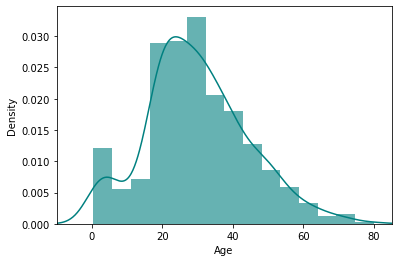

In [16]:
ax = X_train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
X_train["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


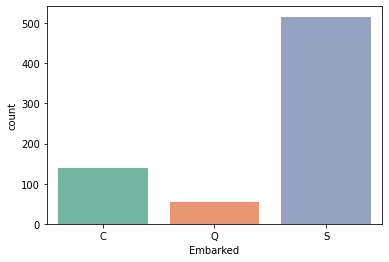

In [17]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=X_train, palette='Set2')
plt.show()

# Train preparation

In [18]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
692,3,male,NaN,0,0,56.4958,S
481,2,male,NaN,0,0,0.0000,S
527,1,male,NaN,0,0,221.7792,S
855,3,female,18.0,0,1,9.3500,S
801,2,female,31.0,1,1,26.2500,S


In [19]:
num_attr = X_train.select_dtypes(include='number').columns

In [20]:
num_attr

Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

### Fill NA - continuouse variable

In [21]:
from sklearn.impute import SimpleImputer

imputer_num = SimpleImputer(strategy='median')
imputer_num.fit(X_train[num_attr])

SimpleImputer(strategy='median')

In [22]:
imputer_num.statistics_

array([28.5   ,  0.    ,  0.    , 14.4542])

In [23]:
X_train_imputer_num = imputer_num.transform(X_train[num_attr])
X_train_imputer_num

array([[ 28.5   ,   0.    ,   0.    ,  56.4958],
       [ 28.5   ,   0.    ,   0.    ,   0.    ],
       [ 28.5   ,   0.    ,   0.    , 221.7792],
       ...,
       [ 48.    ,   1.    ,   3.    ,  34.375 ],
       [ 47.    ,   0.    ,   0.    ,  38.5   ],
       [ 28.5   ,   0.    ,   0.    ,  26.55  ]])

#### Get DataFrame

In [24]:
X_train_num = pd.DataFrame(X_train_imputer_num, columns=num_attr)
X_train_num.head()

,Age,SibSp,Parch,Fare
0,28.5,0.0,0.0,56.4958
1,28.5,0.0,0.0,0.0000
2,28.5,0.0,0.0,221.7792
3,18.0,0.0,1.0,9.3500
4,31.0,1.0,1.0,26.2500


### Fill NA - categorical variables

In [25]:
cat_attr = X_train.select_dtypes(exclude='number').columns
cat_attr

Index(['Pclass', 'Sex', 'Embarked'], dtype='object')

In [26]:
imputer_cat = SimpleImputer(strategy='most_frequent')

X_train_imputer_cat = imputer_cat.fit_transform(X_train[cat_attr])
X_train_imputer_cat

array([[3, 'male', 'S'],
       [2, 'male', 'S'],
       [1, 'male', 'S'],
       ...,
       [3, 'female', 'S'],
       [1, 'male', 'S'],
       [1, 'male', 'S']], dtype=object)

#### Get DataFrame

In [27]:
X_train_cat = pd.DataFrame(X_train_imputer_cat, columns=cat_attr)
X_train_cat.head()

,Pclass,Sex,Embarked
0,3,male,S
1,2,male,S
2,1,male,S
3,3,female,S
4,2,female,S


### Concatenate

In [28]:
X_train_imputer = pd.concat([X_train_num, X_train_cat], axis=1)
X_train_imputer.head()

,Age,SibSp,Parch,Fare,Pclass,Sex,Embarked
0,28.5,0.0,0.0,56.4958,3,male,S
1,28.5,0.0,0.0,0.0000,2,male,S
2,28.5,0.0,0.0,221.7792,1,male,S
3,18.0,0.0,1.0,9.3500,3,female,S
4,31.0,1.0,1.0,26.2500,2,female,S


### Standarisation

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train_imputer[num_attr])
X_train_scaler

array([[-0.08113533, -0.46508428, -0.46618317,  0.5138115 ],
       [-0.08113533, -0.46508428, -0.46618317, -0.66256323],
       [-0.08113533, -0.46508428, -0.46618317,  3.95539858],
       ...,
       [ 1.41700669,  0.47833454,  3.11571343,  0.0532047 ],
       [ 1.34017889, -0.46508428, -0.46618317,  0.13909685],
       [-0.08113533, -0.46508428, -0.46618317, -0.10973011]])

In [30]:
X_train_scaler = pd.DataFrame(X_train_scaler, columns=num_attr)
X_train_scaler.head()

,Age,SibSp,Parch,Fare
0,-0.081135,-0.465084,-0.466183,0.513812
1,-0.081135,-0.465084,-0.466183,-0.662563
2,-0.081135,-0.465084,-0.466183,3.955399
3,-0.887827,-0.465084,0.727782,-0.467874
4,0.110934,0.478335,0.727782,-0.115977


### One hot encoder

In [31]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
X_train_ohe = ohe.fit_transform(X_train_imputer[cat_attr])
# X_train_ohe.todense()  
X_train_ohe

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

#### Get DataFrame

In [32]:
ohe.categories_

[array([1, 2, 3], dtype=object),
 array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object)]

In [33]:
ohe_cols = [f'{i[0]}_{j}' for i in zip(cat_attr, ohe.categories_) for j in i[1]]
ohe_cols

['Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [34]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe_cols)
X_train_ohe.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [35]:
X_train_tr = pd.concat([X_train_scaler, X_train_ohe], axis=1)
X_train_tr.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.081135,-0.465084,-0.466183,0.513812,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-0.081135,-0.465084,-0.466183,-0.662563,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.081135,-0.465084,-0.466183,3.955399,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.887827,-0.465084,0.727782,-0.467874,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.110934,0.478335,0.727782,-0.115977,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


## Fit Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

cls = LogisticRegression()
cls.fit(X_train_tr, y_train)

LogisticRegression()

In [37]:
cls.score(X_train_tr, y_train)

0.8089887640449438

# test_validation

In [38]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
565,3,male,24.0,2,0,24.1500,S
160,3,male,44.0,0,1,16.1000,S
553,3,male,22.0,0,0,7.2250,C
860,3,male,41.0,2,0,14.1083,S
241,3,female,NaN,1,0,15.5000,Q


In [39]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 565 to 637
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    179 non-null    category
 1   Sex       179 non-null    category
 2   Age       139 non-null    float64 
 3   SibSp     179 non-null    int64   
 4   Parch     179 non-null    int64   
 5   Fare      179 non-null    float64 
 6   Embarked  179 non-null    category
dtypes: category(3), float64(2), int64(2)
memory usage: 7.9 KB


In [40]:
X_test_imputer_num = imputer_num.transform(X_test[num_attr])
X_test_imputer_num = pd.DataFrame(X_test_imputer_num, columns=num_attr)

In [41]:
X_test_imputer_cat = imputer_cat.transform(X_test[cat_attr])
X_test_imputer_cat = pd.DataFrame(X_test_imputer_cat, columns=cat_attr)

In [42]:
X_test_scaler = scaler.transform(X_test_imputer_num)
X_test_scaler = pd.DataFrame(X_test_scaler, columns=num_attr)
X_test_scaler.head()

,Age,SibSp,Parch,Fare
0,-0.426860,1.421753,-0.466183,-0.159704
1,1.109696,-0.465084,0.727782,-0.327324
2,-0.580516,-0.465084,-0.466183,-0.512122
3,0.879212,1.421753,-0.466183,-0.368795
4,-0.081135,0.478335,-0.466183,-0.339817


In [43]:
X_test_ohe = ohe.transform(X_test_imputer_cat)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe_cols)
X_test_ohe.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [44]:
X_test_tr = pd.concat([X_test_scaler, X_test_ohe], axis=1)
X_test_tr.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.426860,1.421753,-0.466183,-0.159704,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.109696,-0.465084,0.727782,-0.327324,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,-0.580516,-0.465084,-0.466183,-0.512122,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.879212,1.421753,-0.466183,-0.368795,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,-0.081135,0.478335,-0.466183,-0.339817,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [45]:
cls.score(X_test_tr, y_test)

0.8044692737430168

In [46]:
y_pred = cls.predict(X_test_tr)

### Confussion Matrix

In [47]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=cls.classes_)
cm

array([[98, 12],
       [23, 46]])

In [48]:
tn, fp, fn, tp = cm.ravel()

print(f"True negative: {tn}")
print(f"False positive: {fp}")
print(f"False negative: {fn}")
print(f"True positive: {tp}")

True negative: 98
False positive: 12
False negative: 23
True positive: 46


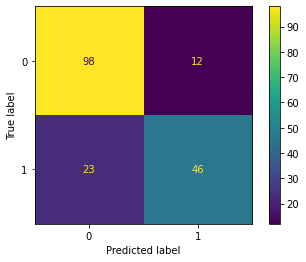

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=cls.classes_)
disp.plot()
plt.show()

[source](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)

### accuracy

In [50]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8044692737430168

### racall

In [51]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.6666666666666666

### precission

In [52]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.7931034482758621

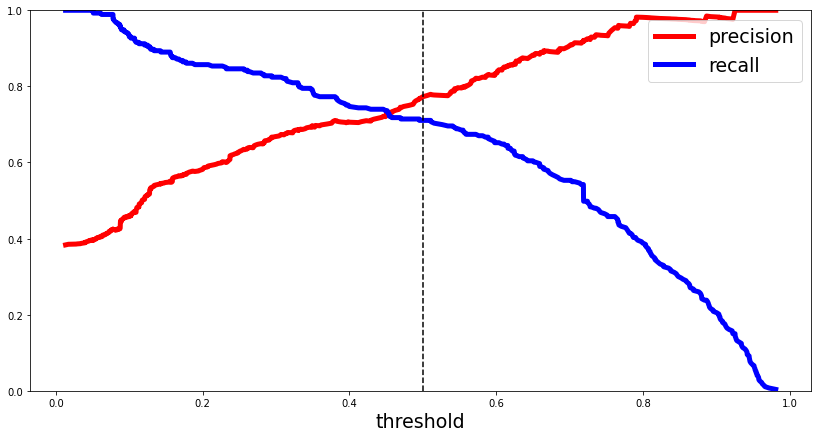

In [62]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = cls.predict_proba(X_train_tr)
y_scores = y_scores[:, 1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)


def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.axvline(x = 0.5, color = 'black', linestyle='--', label='threshold 0.5')
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

### $F_1$ score

In [53]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.7244094488188977

### Calasyfication report

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



### ROC-AUC Curve

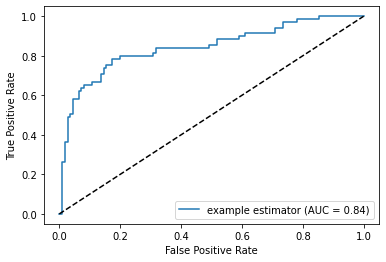

In [55]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay 

y_pred_proba = cls.predict_proba(X_test_tr)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

[source](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html)

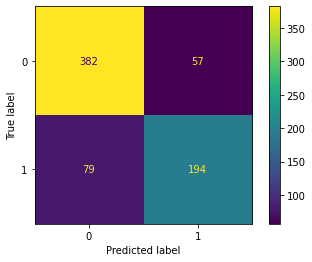

Precision score:	0.77
Recall score:	0.71


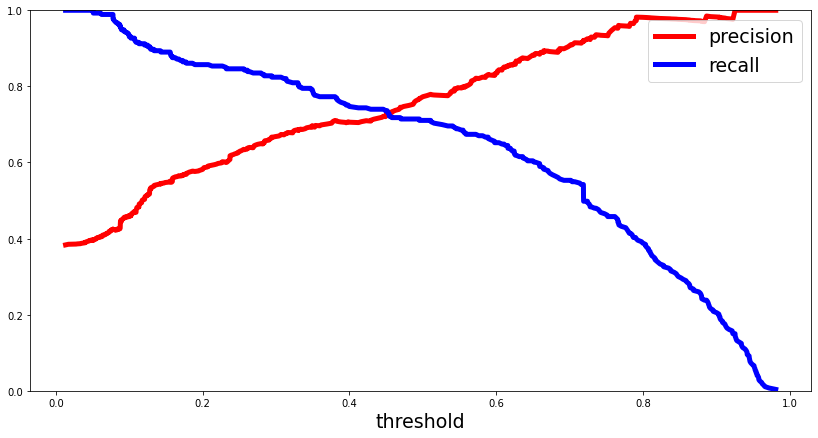

<Figure size 1008x504 with 0 Axes>

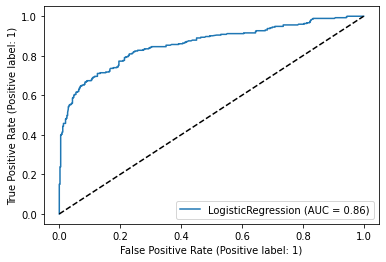

In [71]:
from plot_utils import MetricsUtils

metrics = MetricsUtils(x=X_train_tr, y=y_train, estimator=cls)
metrics()

# Pipeline

In [72]:
num_attr = X_train.select_dtypes(include='number').columns
cat_attr = X_train.select_dtypes(exclude='number').columns

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


num_pipeline = Pipeline(
    [
     ('imputer', SimpleImputer(strategy='median')),
     ('standard_scaller', StandardScaler()),
    ]
)

cat_pipeline = Pipeline(
    [
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('ohe', OneHotEncoder()),
    ]
)

cat_num_pipeline = ColumnTransformer(
    transformers=
    [
     ('numerical', num_pipeline, num_attr),
     ('categorical', cat_pipeline, cat_attr)
    ]
)


In [74]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
692,3,male,NaN,0,0,56.4958,S
481,2,male,NaN,0,0,0.0000,S
527,1,male,NaN,0,0,221.7792,S
855,3,female,18.0,0,1,9.3500,S
801,2,female,31.0,1,1,26.2500,S
...,...,...,...,...,...,...,...
359,3,female,NaN,0,0,7.8792,Q
258,1,female,35.0,0,0,512.3292,C
736,3,female,48.0,1,3,34.3750,S
462,1,male,47.0,0,0,38.5000,S


In [75]:
X_train_tr = cat_num_pipeline.fit_transform(X_train)
X_train_tr

array([[-0.08113533, -0.46508428, -0.46618317, ...,  0.        ,
         0.        ,  1.        ],
       [-0.08113533, -0.46508428, -0.46618317, ...,  0.        ,
         0.        ,  1.        ],
       [-0.08113533, -0.46508428, -0.46618317, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.41700669,  0.47833454,  3.11571343, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.34017889, -0.46508428, -0.46618317, ...,  0.        ,
         0.        ,  1.        ],
       [-0.08113533, -0.46508428, -0.46618317, ...,  0.        ,
         0.        ,  1.        ]])

In [76]:
pd.DataFrame(X_train_tr)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.081135,-0.465084,-0.466183,0.513812,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-0.081135,-0.465084,-0.466183,-0.662563,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.081135,-0.465084,-0.466183,3.955399,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.887827,-0.465084,0.727782,-0.467874,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.110934,0.478335,0.727782,-0.115977,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
707,-0.081135,-0.465084,-0.466183,-0.498500,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
708,0.418245,-0.465084,-0.466183,10.005329,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
709,1.417007,0.478335,3.115713,0.053205,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
710,1.340179,-0.465084,-0.466183,0.139097,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [77]:
cat_num_pipeline.transformers_[1][1]['ohe'].categories_

[array([1, 2, 3], dtype=object),
 array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object)]

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
train_pipeline = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('model', LogisticRegression())
    ]
)

In [80]:
train_pipeline.fit(X_train, y_train)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard_scaller',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  Index(['Pclass', 'Sex', 'Embarked'], dtype='object'))])),
                ('model', LogisticRegression())])

In [81]:
y_pred = train_pipeline.predict(X_test)

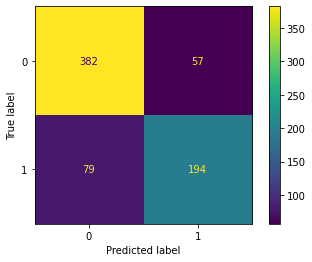

Precision score:	0.77
Recall score:	0.71


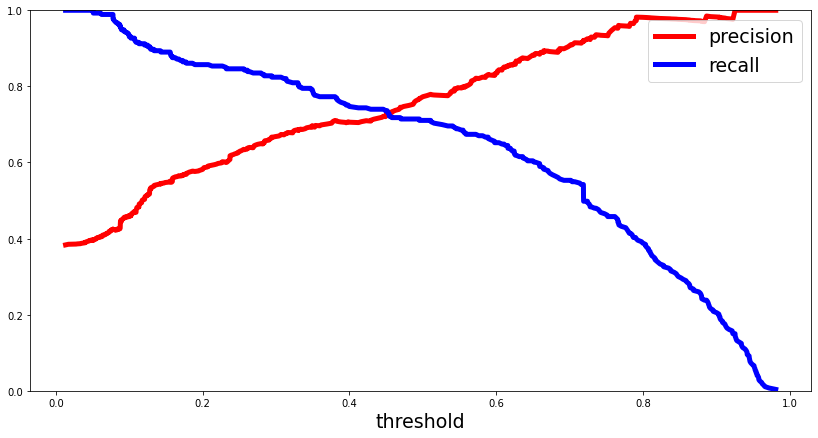

<Figure size 1008x504 with 0 Axes>

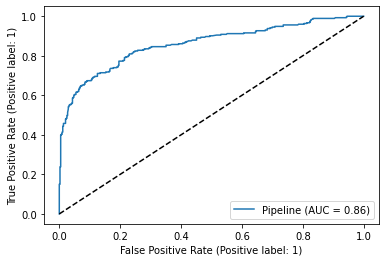

In [82]:
metrics = MetricsUtils(x=X_train, y=y_train, estimator=train_pipeline)
metrics()

# GridSearch

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
param_grid = [
    {
        "cat_num_pipeline__numerical__imputer__strategy": ["mean", "median"],
        "cat_num_pipeline__categorical__ohe__drop": ["first", None],
        "model__C": [0.1, 1],
        "model": [LogisticRegression()]
    }
]

In [85]:
for i in train_pipeline.get_params().keys():
    print(i)

memory
steps
verbose
cat_num_pipeline
model
cat_num_pipeline__n_jobs
cat_num_pipeline__remainder
cat_num_pipeline__sparse_threshold
cat_num_pipeline__transformer_weights
cat_num_pipeline__transformers
cat_num_pipeline__verbose
cat_num_pipeline__verbose_feature_names_out
cat_num_pipeline__numerical
cat_num_pipeline__categorical
cat_num_pipeline__numerical__memory
cat_num_pipeline__numerical__steps
cat_num_pipeline__numerical__verbose
cat_num_pipeline__numerical__imputer
cat_num_pipeline__numerical__standard_scaller
cat_num_pipeline__numerical__imputer__add_indicator
cat_num_pipeline__numerical__imputer__copy
cat_num_pipeline__numerical__imputer__fill_value
cat_num_pipeline__numerical__imputer__missing_values
cat_num_pipeline__numerical__imputer__strategy
cat_num_pipeline__numerical__imputer__verbose
cat_num_pipeline__numerical__standard_scaller__copy
cat_num_pipeline__numerical__standard_scaller__with_mean
cat_num_pipeline__numerical__standard_scaller__with_std
cat_num_pipeline__categor

In [86]:
grid_search = GridSearchCV(train_pipeline, param_grid, verbose=3, scoring = 'recall')

In [87]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END cat_num_pipeline__categorical__ohe__drop=first, cat_num_pipeline__numerical__imputer__strategy=mean, model=LogisticRegression(), model__C=0.1;, score=0.691 total time=   0.0s
[CV 2/5] END cat_num_pipeline__categorical__ohe__drop=first, cat_num_pipeline__numerical__imputer__strategy=mean, model=LogisticRegression(), model__C=0.1;, score=0.527 total time=   0.0s
[CV 3/5] END cat_num_pipeline__categorical__ohe__drop=first, cat_num_pipeline__numerical__imputer__strategy=mean, model=LogisticRegression(), model__C=0.1;, score=0.764 total time=   0.0s
[CV 4/5] END cat_num_pipeline__categorical__ohe__drop=first, cat_num_pipeline__numerical__imputer__strategy=mean, model=LogisticRegression(), model__C=0.1;, score=0.704 total time=   0.0s
[CV 5/5] END cat_num_pipeline__categorical__ohe__drop=first, cat_num_pipeline__numerical__imputer__strategy=mean, model=LogisticRegression(), model__C=0.1;, score=0.704 total time=   0.0s


GridSearchCV(estimator=Pipeline(steps=[('cat_num_pipeline',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standard_scaller',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder())]),
                                                                         Index(['Pclass', 'Sex', 'Embarked'], dtype='object'))])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'cat_num_pipeline__categorical__ohe__drop': ['first',
                                                                       None],
                          'cat_num_pipeline__numerical__imputer__strategy': ['mean',
                                                                             'median'],
                          'model': [LogisticRegression(C=1)],
                          'model__C': [0.1, 1]}],
             scoring='recall', verbose=3)

In [88]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_cat_num_pipeline__categorical__ohe__drop,param_cat_num_pipeline__numerical__imputer__strategy,param_model,param_model__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005667,0.001506,0.002223,0.000218,first,mean,LogisticRegression(C=1),0.1,{'cat_num_pipeline__categorical__ohe__drop': '...,0.690909,0.527273,0.763636,0.703704,0.703704,0.677845,0.079423,7
1,0.004890,0.000375,0.001998,0.000201,first,mean,LogisticRegression(C=1),1,{'cat_num_pipeline__categorical__ohe__drop': '...,0.709091,0.545455,0.781818,0.703704,0.740741,0.696162,0.080326,3
2,0.004413,0.000098,0.001793,0.000068,first,median,LogisticRegression(C=1),0.1,{'cat_num_pipeline__categorical__ohe__drop': '...,0.690909,0.527273,0.763636,0.703704,0.703704,0.677845,0.079423,7
3,0.004464,0.000039,0.001770,0.000043,first,median,LogisticRegression(C=1),1,{'cat_num_pipeline__categorical__ohe__drop': '...,0.709091,0.545455,0.781818,0.703704,0.740741,0.696162,0.080326,3
4,0.004094,0.000040,0.001721,0.000045,None,mean,LogisticRegression(C=1),0.1,{'cat_num_pipeline__categorical__ohe__drop': N...,0.709091,0.545455,0.763636,0.703704,0.722222,0.688822,0.074698,5
5,0.004725,0.000343,0.002053,0.000240,None,mean,LogisticRegression(C=1),1,{'cat_num_pipeline__categorical__ohe__drop': N...,0.709091,0.545455,0.781818,0.722222,0.740741,0.699865,0.081012,1
6,0.004269,0.000079,0.001751,0.000067,None,median,LogisticRegression(C=1),0.1,{'cat_num_pipeline__categorical__ohe__drop': N...,0.709091,0.545455,0.763636,0.703704,0.722222,0.688822,0.074698,5
7,0.004457,0.000043,0.001707,0.000029,None,median,LogisticRegression(C=1),1,{'cat_num_pipeline__categorical__ohe__drop': N...,0.709091,0.563636,0.781818,0.703704,0.740741,0.699798,0.073546,2


# SGD logistic regression

In [ ]:
from sklearn.linear_model import SGDClassifier


sgd_train_pipeline = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('model', SGDClassifier(loss='log_loss'))
    ]
)

sgd_cls.fit(X_train_tr, y_train)